In [2]:
# Import packages for plotting and sample data
import matplotlib.pyplot as plt
from matplotlib import legend
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
def make_line(x):
    y = y = 2.2129*x**4 - 220.68*x**3 + 4697.9*x**2 + 59933*x + 482834
    return y

In [4]:
segments = ['New', 
            'New', 
            'New', 
            'New', 
            'New', 
            'New', 
            'New', 
            'New', 
            'New', 
            'Active Rising', 
            'Active Rising', 
            'Active Rising', 
            'Active Rising', 
            'Active Rising', 
            'Active Rising', 
            'Active Rising', 
            'Active Rising', 
            'Active Rising', 
            'Active Rising', 
            'Active Rising', 
            'Active Rising', 
            'Active Stable', 
            'Active Stable', 
            'Active Stable', 
            'Active Stable', 
            'Active Stable', 
            'Active Stable', 
            'Active Stable', 
            'Active Stable', 
            'Active Stable', 
            'Active Declining', 
            'Active Declining', 
            'Active Declining', 
            'Active Declining', 
            'Active Declining', 
            'Active Declining', 
            'Active Declining', 
            'Lapsed', 
            'Lapsed', 
            'Lapsed', 
            'Lapsed', 
            'Lapsed', 
            'Lapsed', 
            'Inactive +', 
            'Inactive +', 
            'Inactive +', 
            'Inactive +', ]
df = pd.DataFrame(data={'segment': segments})
df['X'] = df.index+1
df['revenue'] = df['X'].apply(make_line)

In [5]:
seg_unique = df['segment'].unique()
scolors = ['#E14525',
          '#E68424',
          '#F2CA38',
          '#1791C0',
          '#4F70B6',
          '#43469D']
tcolors = [
    '#97a7c9',
    '#898888',
    '#f0c816',
    '#a7d3c4'
]

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


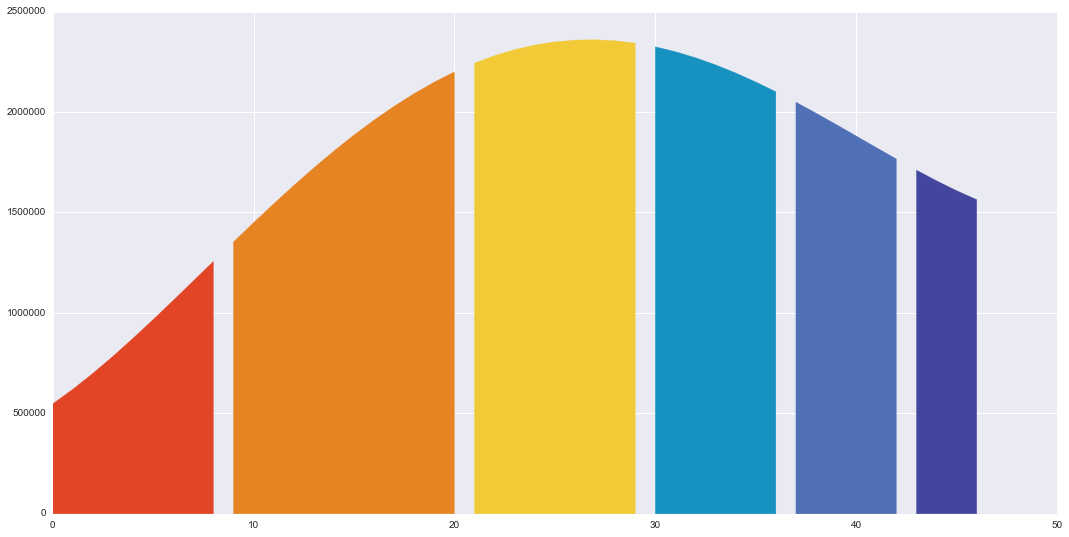

In [6]:
fig, ax = plt.subplots(figsize = (18,9))

for seg in seg_unique:
    df_temp = df[df['segment']==seg]
    plt.fill_between(df_temp.index, df_temp['revenue'], color=scolors[np.where(seg_unique==seg)[0][0]])

plt.rcParams['svg.fonttype'] = 'none'
fig.savefig('lifecycle_chart.svg', format='svg')

In [7]:
tdf = pd.read_csv('tiers.csv')

In [8]:
tiers = tdf['tier'].unique()

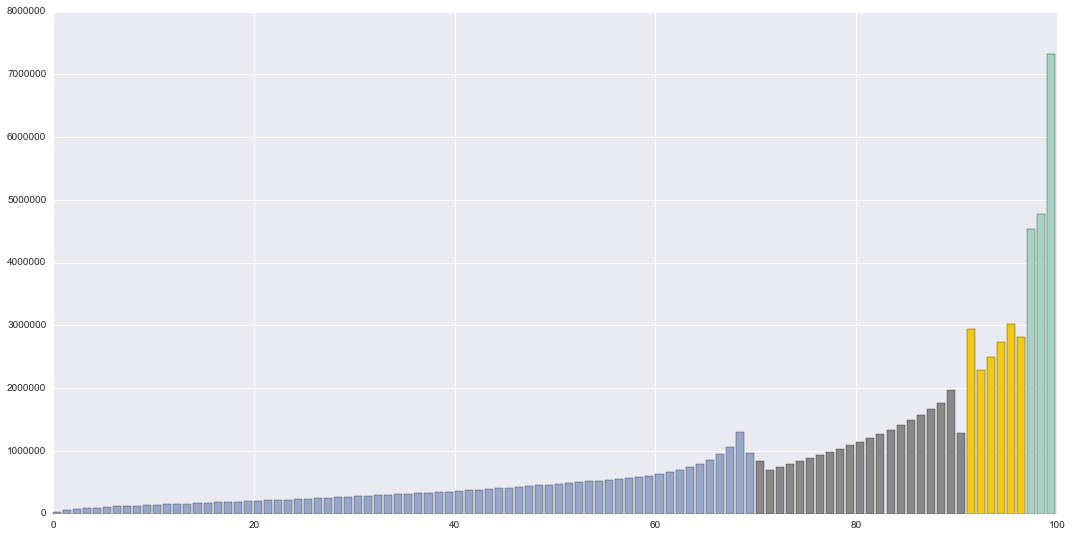

In [9]:
fig, ax = plt.subplots(figsize = (18,9))

for tier in tiers:
    df_temp = tdf[tdf['tier']==tier]
    plt.bar(df_temp.index, df_temp['Revenue'], color=tcolors[np.where(tiers==tier)[0][0]])

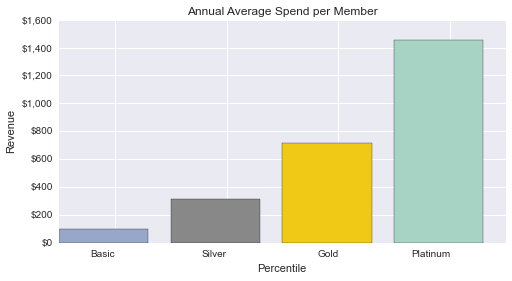

In [29]:
fig, ax = plt.subplots(figsize = (8,4), dpi=72)

gtdf = tdf.groupby('tier').mean().sort_values('percentile')
gtdf['adj_revenue'] = gtdf['Revenue']/3814
plt.bar(np.arange(len(tiers)), gtdf['adj_revenue'], color=tcolors)
plt.xticks(np.arange(0.5, len(tiers)), tiers, horizontalalignment='right')
plt.rcParams['svg.fonttype'] = 'none'
ax.set_xlabel('Percentile')
ax.set_ylabel('Revenue')
ax.set_title('Annual Average Spend per Member')
ax.set_yticklabels([
    '$0',
    '$200',
    '$400',
    '$600',
    '$800',
    '$1,000',
    '$1,200',
    '$1,400',
    '$1,600'
])
fig.savefig('tiers_spend.svg', format='svg')

In [30]:
gtdf

,percentile,Revenue,adj_revenue
tier,,,
Basic,35.5,3.776540e+05,99.017816
Silver,81.0,1.190093e+06,312.032650
Gold,94.5,2.716877e+06,712.343153
Platinum,99.0,5.546538e+06,1454.257463


In [12]:
dfp=pd.read_csv('tiers2.csv')
dfp.head()

,tier,Basic,Gold,Platinum,Silver
0,1,0.00,0.0,0.0,0.0
1,2,34152.93,0.0,0.0,0.0
2,3,66985.47,0.0,0.0,0.0
3,4,81745.25,0.0,0.0,0.0
4,5,92786.69,0.0,0.0,0.0


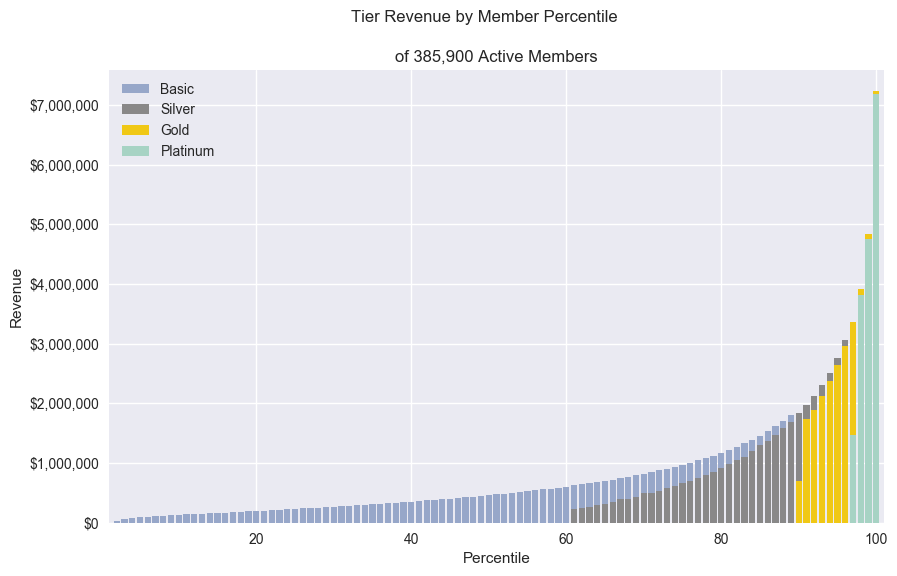

In [14]:
i=np.arange(1,101)
s1=dfp['Basic']
s2=dfp['Silver']
s3=dfp['Gold']
s4=dfp['Platinum']

_s4=pd.Series(np.arange(100))
_s3=[s4[i] if s4[i]!=0 else 0 for i,x in enumerate(s3)]
_s2=[s3[i] if s3[i]!=0 else 0 for i,x in enumerate(s3)]
_s1=[s2[i] if s2[i]!=0 else 0 for i,x in enumerate(s3)]

fig, ax = plt.subplots(figsize = (10,6), dpi=100)
plt.bar(i, s1, bottom=_s1, color=tcolors[0])
plt.bar(i, s2, bottom=_s2, color=tcolors[1])
plt.bar(i, s3, bottom=_s3, color=tcolors[2])
plt.bar(i, s4, bottom=_s4, color=tcolors[3])

plt.legend(tiers)
plt.xlim([1,101])
ax.set_yticklabels([
    '$0',
    '$1,000,000',
    '$2,000,000',
    '$3,000,000',
    '$4,000,000',
    '$5,000,000',
    '$6,000,000',
    '$7,000,000'
])
ax.set_xlabel('Percentile')
ax.set_ylabel('Revenue')
fig.suptitle('Tier Revenue by Member Percentile')
ax.set_title('of 385,900 Active Members')